# Leading Causes of Death in New York City
#### Although death is the end of a life, it can provide useful information to doctors, researchers, and regular people, like you and me. When a person passes, there are many questions that arise: “who died?”, “why did this person pass?”, “when did he/she pass?”. All of these questions help doctors and researchers do improve their jobs. 
#### Between 2007 to 2014, the government collected hospital records that recorded the leading causes of death in New York City. It recorded the year, leading cause of death, gender, the total number of deaths within the leading cause, death rate, and the adjusted age of the person. 
#### Based on this data, I was curious to see if the death rate in NYC decreased over the years. Of course, there are many factor that contribute to this factor such as: “is healthcare improving?”, “how is technology contributing to wellbeing?”, “Is crime related?” 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading file
death = pd.read_csv('causeofdeath.csv')
%matplotlib inline

In [2]:
# if the cell is '.', change to 0. Found that the data had periods in place of numbers. 
## Rather than removing them, I added zeros based on the other numbers, the categories with periods had low values. 
badvalues = death.loc[:,'Deaths'] =="."
death.loc[badvalues,'Deaths']=0

#this changes the string into floats 
death['Deaths'] = death['Deaths'].astype(str).astype(float)

In [3]:
grouped_df = death.groupby(['Year'])['Deaths'].sum()
grouped_year = death.groupby(['Year'])

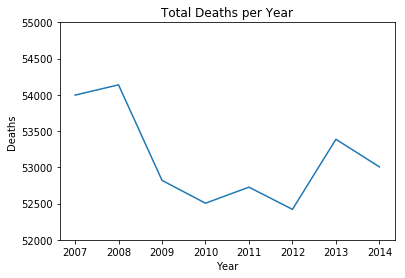

In [4]:
plt.plot(grouped_df)
plt.ylim([52000, 55000])
plt.ylabel('Deaths')
plt.xlabel('Year')
plt.title('Total Deaths per Year')
plt.show()

## Over the years, has there been a decrease in deaths?

#### Based on the graph above, it looks like there's a general decrease in the total number of deaths. However if we look closer by computing the mean, we find that there was a dip in deaths in 2011, followed by an increase the following years. 

In [5]:
death_mean = death.groupby(['Year'])['Deaths'].mean()

Text(0.5,1,'Total Deaths per Year')

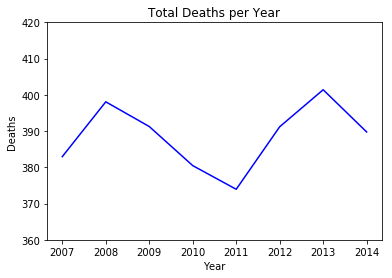

In [6]:
death_mean.plot(color='blue')
plt.ylim([360, 420])
plt.ylabel('Deaths')
plt.xlabel('Year')
plt.title('Total Deaths per Year')

#### As seen in this graph, the average number of deaths in NYC in 2008 and 2013 were very close. 

In [7]:
death_mean.describe()

count      8.000000
mean     388.630933
std        9.115733
min      373.943262
25%      382.330520
50%      390.472015
75%      392.962827
max      401.406015
Name: Deaths, dtype: float64

In [8]:
#List the leading causes of death
death.groupby('Leading Cause')['Deaths'].sum().nlargest(100)

Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)                                                                                       147551.0
Malignant Neoplasms (Cancer: C00-C97)                                                                                                106367.0
All Other Causes                                                                                                                      77999.0
Influenza (Flu) and Pneumonia (J09-J18)                                                                                               18678.0
Diabetes Mellitus (E10-E14)                                                                                                           13794.0
Chronic Lower Respiratory Diseases (J40-J47)                                                                                          13214.0
Cerebrovascular Disease (Stroke: I60-I69)                                                                                             

## Is there a relationship between genders and the cause of death?

#### I continued to dig around and wondered if there was a relationship between gender and the leading cause of death. And I found that in some cases there was a relationship. 

In [9]:
df_heart = death[death['Leading Cause'] == 'Diseases of Heart (I00-I09, I11, I13, I20-I51)']
female_heart = df_heart[df_heart['Sex'] == 'F']
male_heart = df_heart[df_heart['Sex'] =='M']
grouped_fyear = female_heart.groupby('Year').sum()
grouped_myear = male_heart.groupby('Year').sum()

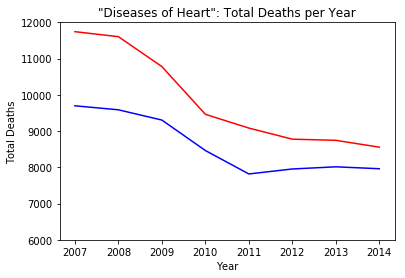

In [10]:
plt.plot(grouped_fyear, color='red')
plt.plot(grouped_myear, color='blue')
plt.ylim([6000, 12000])
plt.ylabel('Total Deaths')
plt.xlabel('Year')
plt.title('"Diseases of Heart": Total Deaths per Year')
plt.show()

#### I organized my list of causes of death by the total number of deaths. Between 2007 and 2014, the top leading cause of death was diseases of the heart. To my surprise, I found that more women passed away from heart related diseases than men. Based on what's seen on the media, I assumed males would have a higher total. 

### However, overall, there is a general trend in the total deaths in this category. 

In [11]:
df_cause = death[death['Leading Cause'] == 'All Other Causes']
female_cause = df_cause[df_cause['Sex'] == 'F']
male_cause = df_cause[df_cause['Sex'] =='M']
grouped_fcyear = female_cause.groupby('Year').sum()
grouped_mcyear = male_cause.groupby('Year').sum()

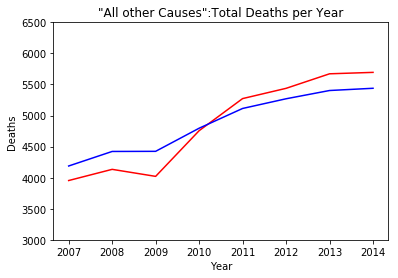

In [12]:
plt.plot(grouped_fcyear, color='red')
plt.plot(grouped_mcyear, color='blue')
plt.ylim([3000, 6500])
plt.ylabel('Deaths')
plt.xlabel('Year')
plt.title('"All other Causes":Total Deaths per Year')
plt.show()

#### I next looked at the third largest category. I was specifically interested in this category due to its vague title. From the looks of it, it seems as though there was an increase. It's difficult to conclude any solid information. However this is something future researchers can look into. Why is it that a category as specific as 'Mental and Behavioral Disorders due to Use of Alcohol' get its own section and other causes of death are lumped into one? 

In [13]:
df_allharm = death[death['Leading Cause'] == 'Intentional Self-Harm (Suicide: X60-X84, Y87.0)']
female_harm = df_allharm[df_allharm['Sex'] == 'F']
male_harm = df_allharm[df_allharm['Sex'] =='M']
grouped_frace = female_harm.groupby('Year').sum()
grouped_mrace = male_harm.groupby('Year').sum()

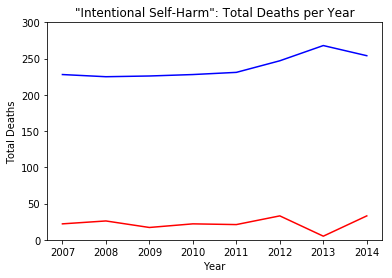

In [14]:
plt.plot(grouped_frace, color='red')
plt.plot(grouped_mrace, color='blue')
plt.ylim([0, 300])
plt.ylabel('Total Deaths')
plt.xlabel('Year')
plt.title('"Intentional Self-Harm": Total Deaths per Year')
plt.show()

#### I found this specifc graph to be interesting due the large difference within genders. Based on the graph, more males died of self harm than females. I would have thought it would be the other way around. If possible, I'm interested in seeing if males had simliar reasons to harm themselves. 

### Lastly, I was curious as to what the numeric values were for cancer. Has the deaths related to cancer gone down? 

In [16]:
df_cancer = death[death['Leading Cause'] == 'Malignant Neoplasms (Cancer: C00-C97)']
female_cancer = df_cancer[df_cancer['Sex'] == 'F']
male_cancer = df_cancer[df_cancer['Sex'] =='M']
grouped_frace = female_cancer.groupby('Year').sum()
grouped_mrace = male_cancer.groupby('Year').sum()

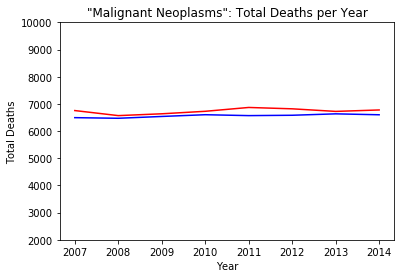

In [20]:
plt.plot(grouped_frace, color='red')
plt.plot(grouped_mrace, color='blue')
plt.ylim([2000, 10000])
plt.ylabel('Total Deaths')
plt.xlabel('Year')
plt.title('"Malignant Neoplasms": Total Deaths per Year')
plt.show()

In [22]:
grouped_frace.describe()

,Deaths
count,8.000000
mean,6734.625000
std,96.141172
min,6569.000000
25%,6702.000000
50%,6741.500000
75%,6787.500000
max,6869.000000


In [23]:
grouped_mrace.describe()

,Deaths
count,8.000000
mean,6561.250000
std,56.256428
min,6471.000000
25%,6527.000000
50%,6575.500000
75%,6600.500000
max,6634.000000


#### To my surprise, there hasn't been much change. From the stats, females have a slightly greater mean than males. Females also have almost double the standard deviation. 